In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing all necessary scaling and machine learning
from sklearn.model_selection import cross_validate
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



# SKLEARN
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [2]:
data = pd.read_csv('../raw_data/school_dropout_data.csv')
data

,hhid,Gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,read_one_lang,write_one_lang,no_read_write,parents_level_ed,num_per_house,type_housing,automobiles,mobile_phones,satellite,no_water,individual_water_net,electrical_net_co,region,province,Age abandoned school,done_test,work_activity_classified
0,A208004,1.0,1.0,1.0,35.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,5.0,3.0,2.0,1.0,1.0,2,2,1,Marrakech - Tensift - Al Haouz,Essaouira,1.0,1.0,1.0
1,A426002,1.0,1.0,2.0,33.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,5.0,3.0,2.0,1.0,2.0,2,2,1,Marrakech - Tensift - Al Haouz,Essaouira,1.0,2.0,0.0
2,A268006,1.0,1.0,1.0,31.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,7.0,2.0,2.0,1.0,2.0,2,2,2,Marrakech - Tensift - Al Haouz,Chichaoua,1.0,1.0,0.0
3,A419004,1.0,2.0,2.0,62.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,6.0,1.0,2.0,1.0,1.0,2,2,1,Sous - Massa - Draa,Taroudant,1.0,2.0,0.0
4,A536006,1.0,2.0,1.0,36.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0,3.0,2.0,1.0,2.0,2,2,2,Marrakech - Tensift - Al Haouz,Essaouira,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,A618007,1.0,1.0,1.0,37.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,5.0,2.0,2.0,1.0,2.0,2,2,1,Marrakech - Tensift - Al Haouz,El Kelaa Des Sraghna,1.0,1.0,0.0
4048,A571001,1.0,1.0,1.0,37.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0,7.0,3.0,2.0,2.0,2.0,2,2,2,Marrakech - Tensift - Al Haouz,El Kelaa Des Sraghna,1.0,1.0,0.0
4049,A359007,1.0,1.0,2.0,42.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2,2,2,Marrakech - Tensift - Al Haouz,El Kelaa Des Sraghna,0.0,1.0,0.0
4050,A578003,1.0,2.0,1.0,50.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,10.0,1.0,2.0,2.0,2.0,2,2,2,Marrakech - Tensift - Al Haouz,El Kelaa Des Sraghna,0.0,1.0,0.0


In [3]:
data.duplicated().sum()

0

In [4]:
data.describe()

,Gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,read_one_lang,write_one_lang,no_read_write,parents_level_ed,num_per_house,type_housing,automobiles,mobile_phones,satellite,no_water,individual_water_net,electrical_net_co,Age abandoned school,done_test,work_activity_classified
count,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000
mean,1.016535,1.416832,1.608379,45.735213,1.056515,1.165842,1.866089,1.974257,1.233168,1.729614,1.752014,1.271652,1.508391,6.731984,2.238401,1.955084,1.341066,1.685834,1.997285,1.834156,1.428677,0.747532,1.259131,0.537512
std,0.127537,0.491633,0.484181,9.528661,0.399351,0.371433,0.340094,0.158151,0.422274,0.439198,0.427612,0.440453,0.921602,1.996352,1.029760,0.207145,0.474126,0.464240,0.052039,0.371986,0.494948,0.434482,0.438212,0.681834
min,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,39.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.752014,1.000000,1.000000,5.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,45.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,7.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,2.000000,2.000000,51.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,8.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,96.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,22.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000


In [5]:
data = data.drop('done_test', axis = 1)

In [6]:
data.dtypes

hhid                         object
Gender                      float64
mother_alive                float64
father_alive                float64
parents_age                 float64
marital_status              float64
darija                      float64
class_arabic                float64
french                      float64
amazygh                     float64
read_one_lang               float64
write_one_lang              float64
no_read_write               float64
parents_level_ed            float64
num_per_house               float64
type_housing                float64
automobiles                 float64
mobile_phones               float64
satellite                   float64
no_water                      int64
individual_water_net          int64
electrical_net_co             int64
region                       object
province                     object
Age abandoned school        float64
work_activity_classified    float64
dtype: object

In [7]:
data.shape

(4052, 26)

# Spliting Data into training and test

In [8]:
X = data.drop('Age abandoned school', axis=1)
y = data['Age abandoned school']

In [9]:
y.value_counts()

1.0    3029
0.0    1023
Name: Age abandoned school, dtype: int64

In [10]:
X.shape

(4052, 25)

In [11]:
y.shape

(4052,)

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3241, 25), (811, 25), (3241,), (811,))

In [13]:
X_train.duplicated().sum()

0

In [14]:
X_train.duplicated().sum(), X_test.duplicated().sum(), y_train.duplicated().sum(), y_test.duplicated().sum()

(0, 0, 3239, 809)

# Selecting categorical and numerical features

In [15]:
X_train_num = X.select_dtypes(include=["float64","int64"])
X_train_cat = X[["region","province"]]

In [16]:
X_train_cat.duplicated().sum()

4035

# Creating Pipeline

In [17]:
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('standard_scaler', StandardScaler())]
)

In [18]:
cat_transformer = Pipeline([
    ('one_hot_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [19]:
preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, X_train_num.columns),
    ('cat_transformer', cat_transformer, X_train_cat.columns)])

preprocessor

ColumnTransformer(transformers=[('num_transformer',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 Index(['Gender', 'mother_alive', 'father_alive', 'parents_age', 'marital_status', 'darija', 'class_arabic', 'french', 'amazygh', 'read_one_lang', 'write_one_lang', 'no_read_write', 'parents_level_ed', 'num_per_house', 'type_housing', 'automobiles', 'mobile_phones', 'satellite', 'no_water', 'individual_water_net', 'electrical_net_co', 'work_activity_classified'], dtype='object')),
                                ('cat_transformer',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['region', 'province'], dtype='object'))])

In [20]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_train_preprocessed

array([[-0.13016848, -0.85240409, -1.25384468, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13016848, -0.85240409, -1.25384468, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13016848, -0.85240409, -1.25384468, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.13016848,  1.17969272,  0.81079283, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13016848, -0.85240409,  0.81079283, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13016848,  1.17969272,  0.81079283, ...,  0.        ,
         1.        ,  0.        ]])

In [21]:
X_test_preprocessed = preprocessor.fit_transform(X_test)
X_test_preprocessed

array([[-0.12763513,  1.21337302,  0.80151684, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12763513, -0.83033944,  0.80151684, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12763513, -0.83033944, -0.00896545, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.12763513, -0.83033944, -1.26804267, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12763513,  1.21337302,  0.80151684, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12763513, -0.83033944, -1.26804267, ...,  0.        ,
         0.        ,  0.        ]])

In [22]:
feature_names = preprocessor.named_transformers_['cat_transformer']\
    .named_steps['one_hot_encoder'].get_feature_names_out(X_train_cat.columns)


X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=list(X_train_num.columns) + list(feature_names))
X_train_preprocessed_df

,Gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,read_one_lang,write_one_lang,no_read_write,parents_level_ed,num_per_house,type_housing,automobiles,mobile_phones,satellite,no_water,individual_water_net,electrical_net_co,work_activity_classified,region_L'Oriental,region_Marrakech - Tensift - Al Haouz,region_Meknhs - Tafilalet,region_Sous - Massa - Draa,region_Tadla - Azilal,province_Al Haouz,province_Azilal,province_Chichaoua,province_Chtouka Ait Baha,province_El Hajeb,province_El Kelaa Des Sraghna,province_Errachidia,province_Essaouira,province_Ifrane,province_Jerada,province_Khenifra,province_Meknes,province_Nador,province_Ouarzazate,province_Taourirt,province_Taroudant,province_Tiznit
0,-0.130168,-0.852404,-1.253845,-0.403083,-0.143026,-0.442176,0.395561,0.164616,1.809052,-1.658706,-1.755966,1.652871,0.524891,-0.867902,0.745255,0.215631,-0.715304,0.657396,0.055633,0.444645,-0.874237,0.67803,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.130168,-0.852404,-1.253845,0.337294,-0.143026,-0.442176,-2.535831,0.164616,-0.554479,-1.658706,-1.755966,1.652871,0.524891,1.119640,0.745255,0.215631,-0.715304,0.657396,0.055633,0.444645,-0.874237,0.67803,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.130168,-0.852404,-1.253845,-0.826156,-0.143026,-0.442176,-2.535831,0.164616,1.809052,-1.658706,-1.755966,1.652871,0.524891,-1.364787,0.745255,0.215631,1.398006,0.657396,0.055633,0.444645,-0.874237,-0.78113,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.130168,-0.852404,0.810793,0.125758,-0.143026,-0.442176,0.395561,0.164616,1.809052,0.615981,0.580398,-0.616612,-0.551800,-0.867902,-1.193246,0.215631,-0.715304,0.657396,0.055633,-2.248987,-0.874237,0.67803,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.130168,1.179693,-1.253845,-0.403083,-0.143026,-0.442176,0.395561,0.164616,-0.554479,-1.658706,-1.755966,1.652871,0.524891,1.119640,-1.193246,0.215631,1.398006,0.657396,0.055633,0.444645,1.143855,0.67803,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,-0.130168,-0.852404,0.810793,0.548830,-0.143026,-0.442176,0.395561,0.164616,1.809052,0.615981,0.580398,-0.616612,-0.551800,1.119640,0.745255,0.215631,-0.715304,0.657396,0.055633,0.444645,-0.874237,2.13719,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3237,-0.130168,-0.852404,0.810793,0.019990,-0.143026,2.268635,0.395561,0.164616,-0.554479,0.615981,0.580398,-0.616612,-0.551800,-0.867902,-1.193246,0.215631,1.398006,-1.521153,0.055633,0.444645,-0.874237,2.13719,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3238,-0.130168,1.179693,0.810793,1.077671,-0.143026,-0.442176,0.395561,0.164616,-0.554479,0.615981,0.580398,-0.616612,-0.551800,0.125869,0.745255,0.215631,-0.715304,0.657396,0.055633,0.444645,1.143855,-0.78113,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3239,-0.130168,-0.852404,0.810793,-0.826156,-0.143026,-0.442176,0.395561,0.164616,-0.554479,0.615981,0.580398,-0.616612,-0.551800,-0.371016,0.745255,0.215631,-0.715304,-1.521153,0.055633,-2.248987,-0.874237,-0.78113,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Testing MLPClassifier

In [23]:
model_mlp = MLPClassifier(max_iter=100)
model_mlp.fit(X_train_preprocessed, y_train)

/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100)

In [24]:
y_pred_mlp = model_mlp.predict(X_test_preprocessed)
y_pred_mlp

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1.

In [25]:
def perform(y_true, y_pred):
    print("Precision : ", precision_score(y_true, y_pred))
    print("Recall : ", recall_score(y_true, y_pred))
    print("Accuracy : ", accuracy_score(y_true, y_pred))
    print("F1 Score : ", f1_score(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_true, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

Precision :  0.7816711590296496
Recall :  0.932475884244373
Accuracy :  0.7484586929716399
F1 Score :  0.8504398826979471

 [[ 27 162]
 [ 42 580]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.39      0.14      0.21       189
         1.0       0.78      0.93      0.85       622

    accuracy                           0.75       811
   macro avg       0.59      0.54      0.53       811
weighted avg       0.69      0.75      0.70       811

******************************************************



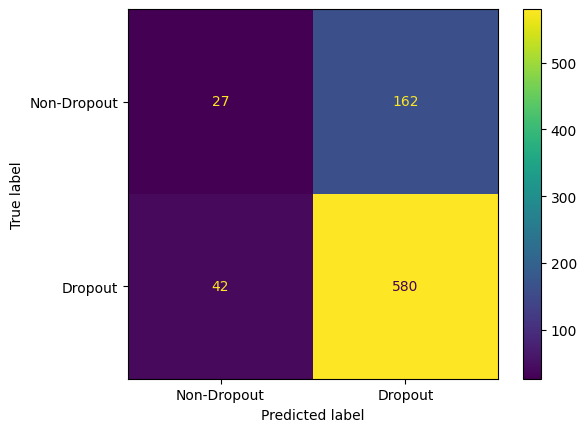

In [26]:
perform(y_test, y_pred_mlp)

In [27]:
parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [28]:
new_model_mlp = MLPClassifier(max_iter=100)

In [29]:
clf = GridSearchCV(model_mlp, parameters, n_jobs=-1, cv=3)

In [30]:
clf.fit(X_train_preprocessed, y_train)

/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: Converg

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [31]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


In [32]:
best_model_params = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive', solver='sgd')

In [33]:
best_model_params.fit(X_train_preprocessed, y_train)

/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive',
              solver='sgd')

In [34]:
y_pred = best_model_params.predict(X_test_preprocessed)

Precision :  0.7669543773119606
Recall :  1.0
Accuracy :  0.7669543773119606
F1 Score :  0.8681088625261689

 [[  0 189]
 [  0 622]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       189
         1.0       0.77      1.00      0.87       622

    accuracy                           0.77       811
   macro avg       0.38      0.50      0.43       811
weighted avg       0.59      0.77      0.67       811

******************************************************



/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

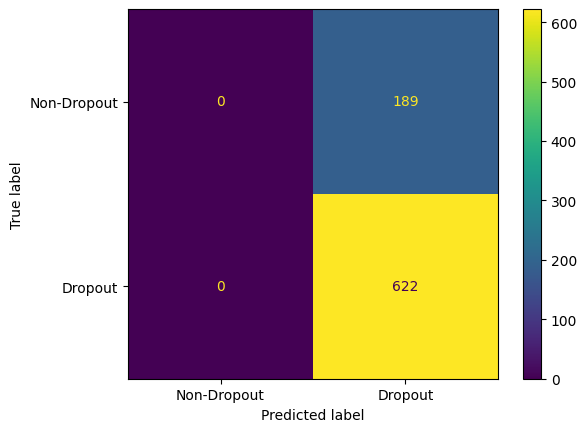

In [35]:
perform(y_test, y_pred)

# Testing KNeighborsClassifier

In [36]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_preprocessed,y_train)
    pred_i = knn.predict(X_test_preprocessed)
    error_rate.append(np.mean(pred_i != y_test))
error_rate

[0.3847102342786683,
 0.499383477188656,
 0.33785450061652283,
 0.3884093711467324,
 0.3094944512946979,
 0.3242909987669544,
 0.2749691738594328,
 0.2934648581997534,
 0.25770653514180025,
 0.27743526510480887,
 0.2527743526510481,
 0.26633785450061653,
 0.25030826140567203,
 0.25524044389642414,
 0.24167694204685575,
 0.25154130702836003,
 0.23921085080147966,
 0.24537607891491986,
 0.23674475955610358,
 0.24907521578298397,
 0.24167694204685575,
 0.24167694204685575,
 0.2404438964241677,
 0.24167694204685575,
 0.23551171393341552,
 0.23551171393341552,
 0.2318125770653514,
 0.2342786683107275,
 0.2318125770653514,
 0.23304562268803947,
 0.23304562268803947,
 0.23304562268803947,
 0.2318125770653514,
 0.2318125770653514,
 0.2318125770653514,
 0.2318125770653514,
 0.2318125770653514,
 0.2318125770653514,
 0.2318125770653514]

 Minimum error: 0.2318125770653514 at K = 27


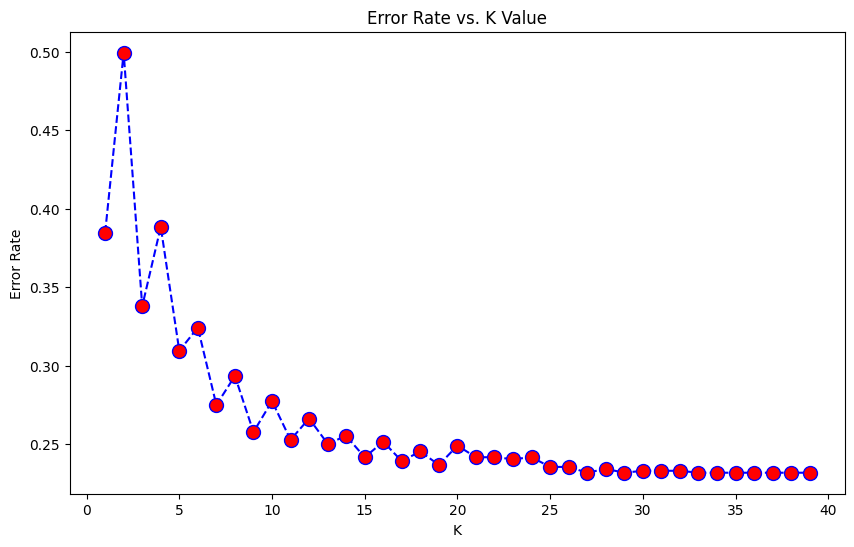

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate)) + 1
print(f' Minimum error: {min(error_rate)} at K = {req_k_value}')

In [38]:
model_kn = KNeighborsClassifier(n_neighbors = req_k_value, metric='minkowski', p=2)
model_kn.fit(X_train_preprocessed, y_train)

KNeighborsClassifier(n_neighbors=27)

In [39]:
y_pred_kn = model_kn.predict(X_test_preprocessed)
y_pred_kn

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Precision :  0.7685643564356436
Recall :  0.9983922829581994
Accuracy :  0.7681874229346486
F1 Score :  0.8685314685314686

 [[  2 187]
 [  1 621]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.67      0.01      0.02       189
         1.0       0.77      1.00      0.87       622

    accuracy                           0.77       811
   macro avg       0.72      0.50      0.44       811
weighted avg       0.74      0.77      0.67       811

******************************************************



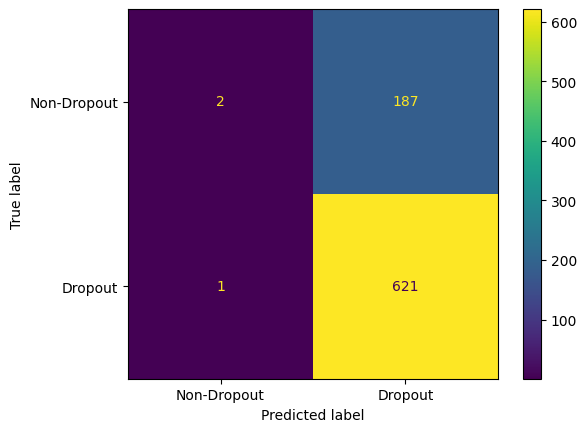

In [40]:
perform(y_test, y_pred_kn)

In [41]:
# X_num = X.select_dtypes(include=["float64","int64"])
# X_cat = X[["region","province"]]

In [42]:
# cat_preprocessor = make_pipeline(
#     OneHotEncoder(sparse_output = False, handle_unknown='ignore')
# )

In [43]:
# num_processor = make_pipeline(
#     MinMaxScaler()
# )

In [44]:
# preprocessor = ColumnTransformer([
#     ('cat_pipeline', cat_preprocessor, X_cat.columns),
#     ('num_pipline', num_processor, X_num.columns),
# ], remainder='drop').set_output(transform='pandas')

In [45]:
# preprocessor

In [46]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [47]:
# preprocessor.fit_transform(X_train)

In [48]:
X_test_preprocessed

array([[-0.12763513,  1.21337302,  0.80151684, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12763513, -0.83033944,  0.80151684, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12763513, -0.83033944, -0.00896545, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.12763513, -0.83033944, -1.26804267, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12763513,  1.21337302,  0.80151684, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12763513, -0.83033944, -1.26804267, ...,  0.        ,
         0.        ,  0.        ]])

In [49]:
X_train_preprocessed

array([[-0.13016848, -0.85240409, -1.25384468, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13016848, -0.85240409, -1.25384468, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13016848, -0.85240409, -1.25384468, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.13016848,  1.17969272,  0.81079283, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13016848, -0.85240409,  0.81079283, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13016848,  1.17969272,  0.81079283, ...,  0.        ,
         1.        ,  0.        ]])

# Testing CatBoostClassifier

In [50]:
from catboost import CatBoostClassifier

In [51]:
catmodel = CatBoostClassifier(
    iterations=500,
    custom_loss=['Precision', 'Recall', 'F1', 'Accuracy'], 
    random_seed=42,
    auto_class_weights='Balanced'
)

In [52]:
catmodel.fit(
    X_train_preprocessed, y_train, 
    eval_set=(X_test_preprocessed, y_test),
    verbose=False,
    plot=False
)

In [53]:
y_pred_cat = catmodel.predict(X_test_preprocessed)
y_pred_cat

array([1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1.

Precision :  0.8469656992084432
Recall :  0.5160771704180064
Accuracy :  0.5573366214549939
F1 Score :  0.6413586413586413

 [[131  58]
 [301 321]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.30      0.69      0.42       189
         1.0       0.85      0.52      0.64       622

    accuracy                           0.56       811
   macro avg       0.58      0.60      0.53       811
weighted avg       0.72      0.56      0.59       811

******************************************************



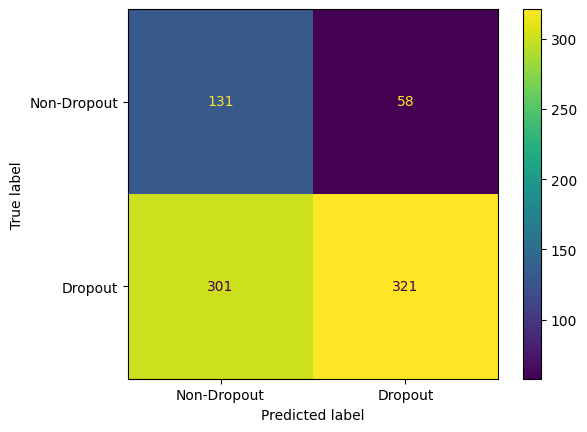

In [54]:
perform(y_test, y_pred_cat)